# Importaciones necesarias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.cbook as cbook
import matplotlib.image as image
import fastf1.plotting

In [2]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

In [3]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [4]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
#piloto1 = input('Piloto 1: ')
#piloto2 = input('Piloto 2: ')

Año: 2022
Round: 22
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R


## Carga de la sesión

In [5]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']


# Listado de pilotos

In [6]:
drivers = pd.unique(session.laps['Driver'])
drivers
# seleccionar un solo piloto drivers[0] - SAI

array(['VER', 'LEC', 'PER', 'SAI', 'RUS', 'NOR', 'OCO', 'STR', 'RIC',
       'VET', 'TSU', 'ZHO', 'ALB', 'GAS', 'BOT', 'MSC', 'MAG', 'HAM',
       'LAT', 'ALO'], dtype=object)

# Listado de Equipos

In [7]:
teams = pd.unique(session.laps['Team'])
teams

array(['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren', 'Alpine',
       'Aston Martin', 'AlphaTauri', 'Alfa Romeo', 'Williams',
       'Haas F1 Team'], dtype=object)

In [8]:
#session.results[0:5]
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:27:45.914000,Finished,25.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,3.0,NaT,NaT,NaT,0 days 01:27:54.685000,Finished,18.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,2.0,NaT,NaT,NaT,0 days 01:27:56.007000,Finished,15.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,4.0,4.0,NaT,NaT,NaT,0 days 01:28:10.806000,Finished,12.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,5.0,6.0,NaT,NaT,NaT,0 days 01:28:21.802000,Finished,10.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,6.0,7.0,NaT,NaT,NaT,0 days 01:28:42.148000,Finished,9.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,8.0,NaT,NaT,NaT,0 days 01:28:43.154000,Finished,6.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,8.0,14.0,NaT,NaT,NaT,0 days 01:29:02.845000,Finished,4.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,9.0,13.0,NaT,NaT,NaT,0 days 01:29:09.182000,Finished,2.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,10.0,9.0,NaT,NaT,NaT,0 days 01:29:09.812000,Finished,1.0


# tabla de vueltas más rápidas

In [9]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [10]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [11]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     NOR 0 days 00:01:28.391000        0 days 00:00:00
1     RUS 0 days 00:01:28.836000 0 days 00:00:00.445000
2     SAI 0 days 00:01:28.879000 0 days 00:00:00.488000
3     PER 0 days 00:01:28.972000 0 days 00:00:00.581000
4     OCO 0 days 00:01:29.333000 0 days 00:00:00.942000
5     VER 0 days 00:01:29.392000 0 days 00:00:01.001000
6     TSU 0 days 00:01:29.489000 0 days 00:00:01.098000
7     ZHO 0 days 00:01:29.600000 0 days 00:00:01.209000
8     STR 0 days 00:01:29.620000 0 days 00:00:01.229000
9     LEC 0 days 00:01:29.719000 0 days 00:00:01.328000
10    HAM 0 days 00:01:29.788000 0 days 00:00:01.397000
11    MSC 0 days 00:01:29.833000 0 days 00:00:01.442000
12    ALB 0 days 00:01:29.939000 0 days 00:00:01.548000
13    LAT 0 days 00:01:30.309000 0 days 00:00:01.918000
14    VET 0 days 00:01:30.312000 0 days 00:00:01.921000
15    BOT 0 days 00:01:30.352000 0 days 00:00:01.961000
16    ALO 0 days 00:01:30.579000 0 days 00:00:02

In [12]:
list_laps = list()
for drv in drivers:
    drvs_laps = session.laps.pick_driver(drv)
    list_laps.append(drvs_laps)

In [13]:
print(list_laps)

[                     Time DriverNumber                LapTime  LapNumber  \
0  0 days 01:03:42.621000            1                    NaT          1   
1  0 days 01:05:13.162000            1 0 days 00:01:30.541000          2   
2  0 days 01:06:43.130000            1 0 days 00:01:29.968000          3   
3  0 days 01:08:13.498000            1 0 days 00:01:30.368000          4   
4         0 days 01:09:44            1 0 days 00:01:30.502000          5   
5  0 days 01:11:14.567000            1 0 days 00:01:30.567000          6   
6  0 days 01:12:45.228000            1 0 days 00:01:30.661000          7   
7  0 days 01:14:15.919000            1 0 days 00:01:30.691000          8   
8  0 days 01:15:46.520000            1 0 days 00:01:30.601000          9   
9  0 days 01:17:17.141000            1 0 days 00:01:30.621000         10   
10 0 days 01:18:47.939000            1 0 days 00:01:30.798000         11   
11 0 days 01:20:18.860000            1 0 days 00:01:30.921000         12   
12 0 days 0

In [14]:
print(list_laps[0]['LapTime'],['LapNumber'])
print(list_laps[0]['LapNumber'])
print(pd.unique(list_laps[0]['Driver']))


0                       NaT
1    0 days 00:01:30.541000
2    0 days 00:01:29.968000
3    0 days 00:01:30.368000
4    0 days 00:01:30.502000
5    0 days 00:01:30.567000
6    0 days 00:01:30.661000
7    0 days 00:01:30.691000
8    0 days 00:01:30.601000
9    0 days 00:01:30.621000
10   0 days 00:01:30.798000
11   0 days 00:01:30.921000
12   0 days 00:01:30.747000
13   0 days 00:01:30.966000
14   0 days 00:01:31.023000
15   0 days 00:01:31.245000
16   0 days 00:01:31.592000
17   0 days 00:01:31.598000
18   0 days 00:01:31.882000
19   0 days 00:01:34.033000
20   0 days 00:01:51.197000
21   0 days 00:01:30.660000
22   0 days 00:01:30.671000
23   0 days 00:01:30.955000
24   0 days 00:01:30.803000
25   0 days 00:01:30.892000
26   0 days 00:01:30.610000
27   0 days 00:01:30.443000
28   0 days 00:01:30.271000
29   0 days 00:01:29.936000
30   0 days 00:01:30.063000
31   0 days 00:01:29.924000
32   0 days 00:01:29.808000
33   0 days 00:01:29.891000
34   0 days 00:01:30.109000
35   0 days 00:01:29

In [15]:
print(drvs_laps['LapNumber'],drvs_laps['LapTime'])

1090     1
1091     2
1092     3
1093     4
1094     5
1095     6
1096     7
1097     8
1098     9
1099    10
1100    11
1101    12
1102    13
1103    14
1104    15
1105    16
1106    17
1107    18
1108    19
1109    20
1110    21
1111    22
1112    23
1113    24
1114    25
1115    26
1116    27
Name: LapNumber, dtype: int64 1090                      NaT
1091   0 days 00:01:32.329000
1092   0 days 00:01:31.539000
1093   0 days 00:01:31.618000
1094   0 days 00:01:31.638000
1095   0 days 00:01:32.035000
1096   0 days 00:01:31.836000
1097   0 days 00:01:32.527000
1098   0 days 00:01:32.452000
1099   0 days 00:01:32.562000
1100   0 days 00:01:32.651000
1101   0 days 00:01:32.427000
1102   0 days 00:01:32.566000
1103   0 days 00:01:32.892000
1104   0 days 00:01:32.227000
1105   0 days 00:01:33.788000
1106   0 days 00:01:32.439000
1107   0 days 00:01:32.541000
1108   0 days 00:01:34.941000
1109   0 days 00:01:50.604000
1110   0 days 00:01:31.273000
1111   0 days 00:01:31.148000
1112   0 days

In [16]:
#driver_color = list()
#for index, lap in fastest_laps.iterlaps():
#    print(lap['Driver'])
#    if pd.isnull(lap['Driver']):
#        color = '#000000'
#    else:
#        color = ff1.plotting.driver_color('Driver')
#    driver_color.append(color)

In [17]:
# Graficador
#ff1.plotting.driver_color(driver1)

In [18]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    print(lap['Team'])
    if pd.isnull(lap['Team']):
        color = '#000000'
    else:
        color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

McLaren
Mercedes
Ferrari
Red Bull Racing
Alpine
Red Bull Racing
AlphaTauri
Alfa Romeo
Aston Martin
Ferrari
Mercedes
Haas F1 Team
Williams
Williams
Aston Martin
Alfa Romeo
Alpine
McLaren
AlphaTauri
Haas F1 Team


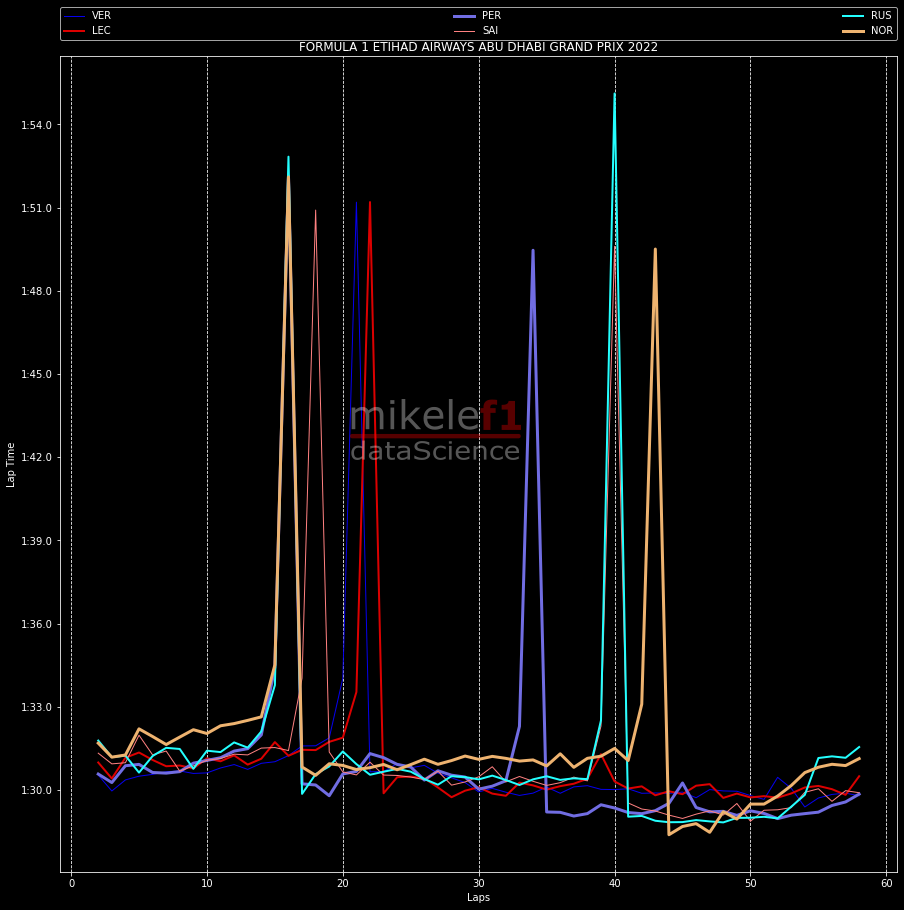

In [21]:
#with cbook.get_sample_data('../fastf1/images/logog.png') as file:
#    im = image.imread(file)

    
im = image.imread('../fastf1/images/logog.png')
    #Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [15, 15]

xx = list_laps[0]['LapNumber']
yy = list_laps[0]['LapTime']
c0 = pd.unique(list_laps[0]['Driver'])
c00 = ff1.plotting.driver_color(c0[0])
xx1 = list_laps[1]['LapNumber']
yy1 = list_laps[1]['LapTime']
c1 = pd.unique(list_laps[1]['Driver'])
c11 = ff1.plotting.driver_color(c1[0])
xx2 = list_laps[2]['LapNumber']
yy2 = list_laps[2]['LapTime']
c2 = pd.unique(list_laps[2]['Driver'])
c22 = ff1.plotting.driver_color(c2[0])
xx3 = list_laps[3]['LapNumber']
yy3 = list_laps[3]['LapTime']
c3 = pd.unique(list_laps[3]['Driver'])
c33 = ff1.plotting.driver_color(c3[0])
xx4 = list_laps[4]['LapNumber']
yy4 = list_laps[4]['LapTime']
c4 = pd.unique(list_laps[4]['Driver'])
c44 = ff1.plotting.driver_color(c4[0])
xx5 = list_laps[5]['LapNumber']
yy5 = list_laps[5]['LapTime']
c5 = pd.unique(list_laps[5]['Driver'])
c55 = ff1.plotting.driver_color(c5[0])

# Etiquetas Verticales | Pilotos
#ax.set_yticks(fastest_laps.index,labels=fastest_laps['Driver'])
ax.set(ylabel='Lap Time', xlabel='Laps')

ax.plot(xx,yy,color=c00, label=c0[0])
ax.plot(xx1,yy1,color=c11, label=c1[0])
ax.plot(xx2,yy2,color=c22, label=c2[0])
ax.plot(xx3,yy3,color=c33, label=c3[0])
ax.plot(xx4,yy4,color=c44, label=c4[0])
ax.plot(xx5,yy5,color=c55, label=c5[0])


ax.get_lines()[0].set_linewidth(1)
ax.get_lines()[1].set_linewidth(2)
ax.get_lines()[2].set_linewidth(3)
ax.get_lines()[3].set_linewidth(1)
ax.get_lines()[4].set_linewidth(2)
ax.get_lines()[5].set_linewidth(3)


#ax.invert_yaxis()
# Etiquetas
ax.set_title(session.event['OfficialEventName'])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=3, mode="expand", borderaxespad=0.)
ax.set_ylabel('Lap Time')
ax.set_xlabel('Laps')
session.event

# Barras
# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)


fig.figimage(im, xo=350, yo=450, zorder=13, alpha=.35)


#Mostrar gráfico
#plt.savefig('2022-13-LFR-6Top.png')
nombrearchivo = str(year)+'-'+str(wknd)+'-LF'+ses+'-'+'6top.png'
plt.savefig(nombrearchivo)
plt.show()

In [21]:
print(ff1.plotting.driver_color('LEC'))

#dc0000


In [22]:
print(c0[0])

STR
